# HW02 – Visualize Real Estate Data
### By Donovan Manogue





## Section 3 Import Libraries

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline 
#importing the necessarry libraries and using appropriate styles for this homework.

## Section 4 Import Data


In [366]:
df_realestate= pd.read_csv('data/Real Estate Data - Week 2.csv', index_col=0, header=0)

#importing the realestate data and creating a dataframe for the data.


## Section 5 Create Groupby Dataframes and Barplot


### Section 5a Create the df_results dataframe

In [370]:
df_result = df_realestate.groupby('Dwelling Type')['Sale Price'].mean().reset_index()
df_result

,Dwelling Type,Sale Price
0,1-1/2 STORY ALL AGES,145642.956522
1,1-STORY 1945 & OLDER,98415.338710
2,1-STORY 1946 & NEWER,183983.785579
3,1-STORY PUD,200779.080460
4,2 FAMILY CONVERSION,129755.555556
5,2-1/2 STORY ALL AGES,196633.333333
6,2-STORY 1945 & OLDER,165833.896552
7,2-STORY 1946 & NEWER,232236.602740
8,2-STORY PUD,138647.380952
9,DUPLEX,134271.272727


In [372]:
df_result = df_result.sort_values('Sale Price', ascending = False)
df_result

,Dwelling Type,Sale Price
7,2-STORY 1946 & NEWER,232236.602740
3,1-STORY PUD,200779.080460
5,2-1/2 STORY ALL AGES,196633.333333
2,1-STORY 1946 & NEWER,183983.785579
11,SPLIT OR MULTI-LEVEL,169775.789474
6,2-STORY 1945 & OLDER,165833.896552
10,SPLIT FOYER,147810.000000
0,1-1/2 STORY ALL AGES,145642.956522
8,2-STORY PUD,138647.380952
9,DUPLEX,134271.272727


In [374]:
#Grouped the dataframe by the Dwelling type to Sale Price. Reset the index to make it look cleaner and then sorted the price from greatest to least


### Section 5b Create a Barplot based on Dwelling Type

Text(0, 0.5, 'Dwelling Type')

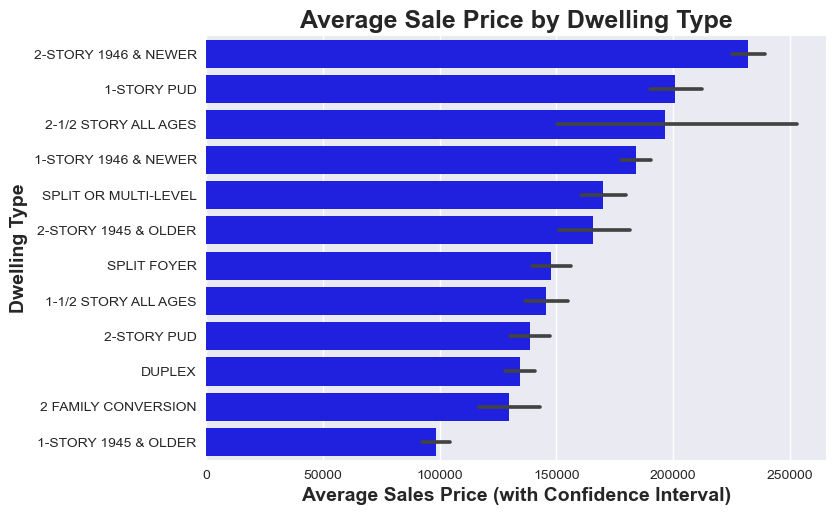

In [377]:
sns.barplot(x ='Sale Price', y = 'Dwelling Type', data=df_realestate, order =df_result['Dwelling Type'], color = 'b')
plt.title('Average Sale Price by Dwelling Type', fontweight='bold', fontsize='18', horizontalalignment='center')
plt.xlabel('Average Sales Price (with Confidence Interval)', fontweight='bold',fontsize='14', horizontalalignment='center')
plt.ylabel('Dwelling Type', fontweight='bold', fontsize='14', horizontalalignment='center')

The bar plot results show that the 2 story 1946 & Newer Dwelling type has the highest average sales price. The Dwelling type with the widest confident inerval making it the most instable average sales price.

In [379]:
#In this section I created a barplot based on the Dwelling type, where I had the Dwelling type as the y value and the sales price as the x value.


### Section 5c: Create a Barplot based on Location Condition

In [383]:
df_locCond = df_realestate.groupby('Location Condition')['Sale Price'].count().reset_index()
df_locCond

,Location Condition,Sale Price
0,Adjacent Arterial St,44
1,Adjacent Feeder St,73
2,Adjacent Pos Feature,8
3,Adjacent Railroad,37
4,Near Pos Feature,19
5,Near Railroad,9
6,Normal,1200


In [385]:
df_locCond = df_locCond.sort_values('Sale Price', ascending = False)
df_locCond

,Location Condition,Sale Price
6,Normal,1200
1,Adjacent Feeder St,73
0,Adjacent Arterial St,44
3,Adjacent Railroad,37
4,Near Pos Feature,19
5,Near Railroad,9
2,Adjacent Pos Feature,8


In [387]:
var_total = df_locCond['Sale Price'].sum()

In [389]:
df_locCond['Percent']=df_locCond['Sale Price']/var_total

Text(0, 0.5, 'Percentage')

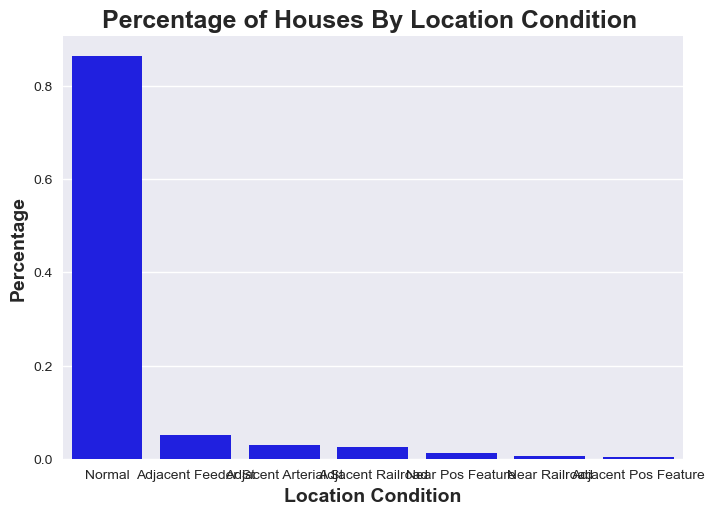

In [391]:
sns.barplot(x ='Location Condition', y = 'Percent', data=df_locCond, order =df_locCond['Location Condition'], color = 'b',)
plt.title('Percentage of Houses By Location Condition ', fontweight='bold', fontsize='18', horizontalalignment='center')
plt.xlabel('Location Condition', fontweight='bold',fontsize='14', horizontalalignment='center')
plt.ylabel('Percentage', fontweight='bold', fontsize='14', horizontalalignment='center')

The bar plot results show that the percent of houses with normal location conditions make up 90% of the houses. While all other options make up the other 10% of the data.

In [394]:
# Created a bar graph based on location and the condition of that locaition.

## Section 6 Create Distributions with Histograms and (Boxplots, Violoinplots, and Boxenplots)


### Section 6a: Histogram of Living Area Above Grade


Text(5.569444444444445, 0.5, 'Count')

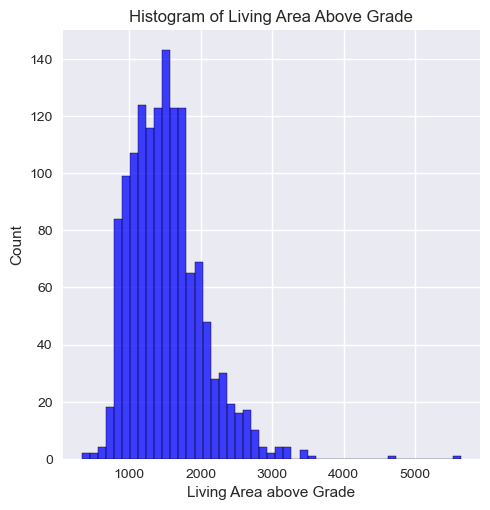

In [398]:
sns.displot(df_realestate['Living Area Above Grade'], kde=False ,color='b')
plt.title('Histogram of Living Area Above Grade')
plt.xlabel('Living Area above Grade')
plt.ylabel('Count')

This histogram shows the count of the the living area above Grade. It looks like this histogram shows the sample is distrubuted fairly well with a nice positive skew. It looks like there might be some outliers past 4000, we might want to take a look and see why that might be happening, or what is causing it.

In [401]:
# I created a hisotgram to find out the count of lviing area baove grade.

### Section 6b: Boxenplot of Sale Price by Kitchen Quality Rating

Text(0, 0.5, 'Sale Price')

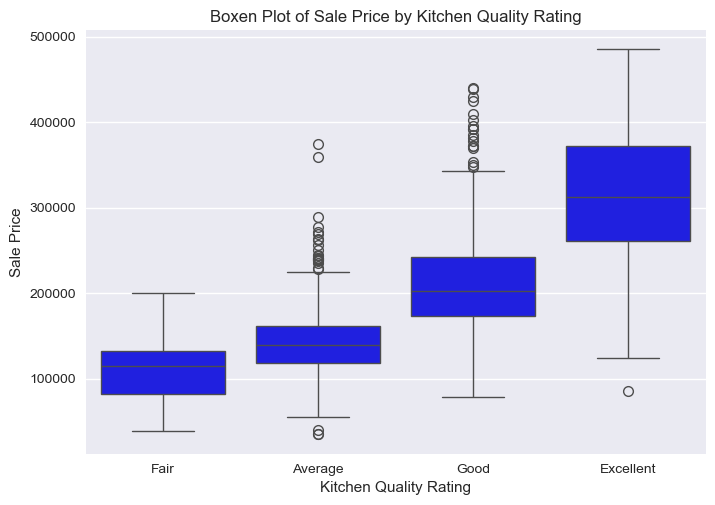

In [404]:
sns.boxplot(x='Kitchen Qual',y='Sale Price', data = df_realestate, color='b', order=['Fair','Average','Good','Excellent'])
plt.title('Boxen Plot of Sale Price by Kitchen Quality Rating')
plt.xlabel('Kitchen Quality Rating')
plt.ylabel('Sale Price')


The boxenplot seems to show a good amount of outliers for the Average and Good Category. Looks like something we would want to look into.

In [407]:
# Created a boxen plot that showed how much the kitchen quality had an effect on the house sales price.

### Section 6c: Create Z-Scores for Sale Price and Violinplot

In [410]:
mean_price = df_realestate['Sale Price'].mean()
stdev_price = df_realestate['Sale Price'].std()

print('The mean sale price is $',mean_price, '.' ,'\nThe standard Deviation of sale price is $',stdev_price,'.')

The mean sale price is $ 181142.5964028777 . 
The standard Deviation of sale price is $ 71523.88847232792 .


In [412]:
df_realestate['z-score']= ((df_realestate['Sale Price']-mean_price)/stdev_price)
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Alley,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,...,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,z-score
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,NaN,Level,College Creek,Normal,7,5,2003,...,2,0,61,0,0,0,0,Normal Sale,208500,0.382493
2,1-STORY 1946 & NEWER,80.0,9600,NaN,Level,Veenker,Adjacent Feeder St,6,8,1976,...,2,298,0,0,0,0,0,Normal Sale,181500,0.004997
3,2-STORY 1946 & NEWER,68.0,11250,NaN,Level,College Creek,Normal,7,5,2001,...,2,0,42,0,0,0,0,Normal Sale,223500,0.592213
4,2-STORY 1945 & OLDER,60.0,9550,NaN,Level,Crawford,Normal,7,5,1915,...,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,-0.575229
5,2-STORY 1946 & NEWER,84.0,14260,NaN,Level,Northridge,Normal,8,5,2000,...,3,192,84,0,0,0,0,Normal Sale,250000,0.962719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62.0,7917,NaN,Level,Gilbert,Normal,6,5,1999,...,2,0,40,0,0,0,0,Normal Sale,175000,-0.085882
1457,1-STORY 1946 & NEWER,85.0,13175,NaN,Level,Northwest Ames,Normal,6,6,1978,...,2,349,0,0,0,0,0,Normal Sale,210000,0.403465
1458,2-STORY 1945 & OLDER,66.0,9042,NaN,Level,Crawford,Normal,7,9,1941,...,1,0,60,0,0,0,0,Normal Sale,266500,1.193411


<Axes: >

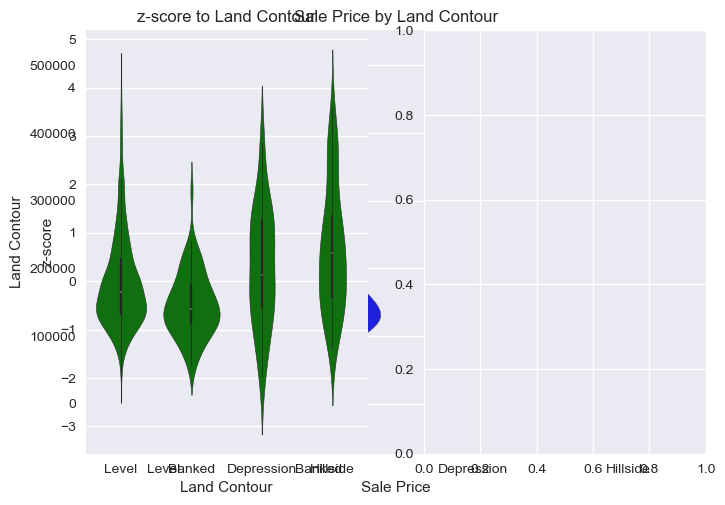

In [414]:
sns.violinplot(y='Sale Price',x='Land Contour',data=df_realestate,color='b')
plt.title('Sale Price by Land Contour')
plt.xlabel('Sale Price')
plt.ylabel('Land Contour')
plt.subplot(121)
sns.violinplot(y='z-score',x='Land Contour',data=df_realestate,color='g')
plt.title('z-score to Land Contour')
plt.xlabel('Land Contour')
plt.ylabel('z-score')
plt.subplot(122)

Text(0, 0.5, 'z-score')

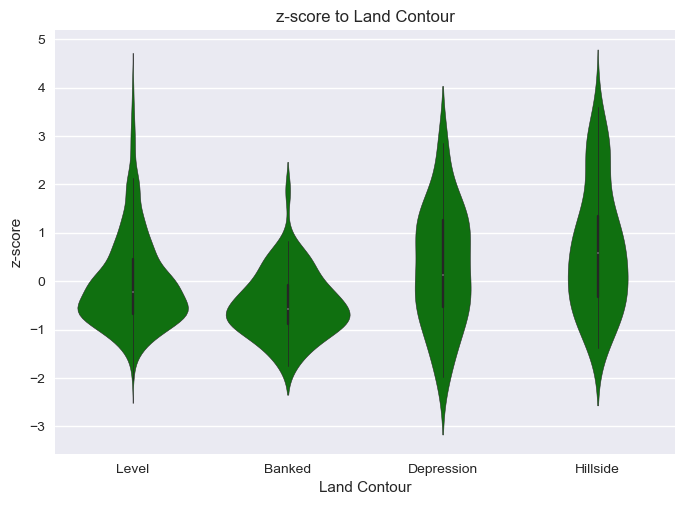

In [421]:
sns.violinplot(y='z-score',x='Land Contour',data=df_realestate,color='g')
plt.title('z-score to Land Contour')
plt.xlabel('Land Contour')
plt.ylabel('z-score')


Text(0, 0.5, 'Land Contour')

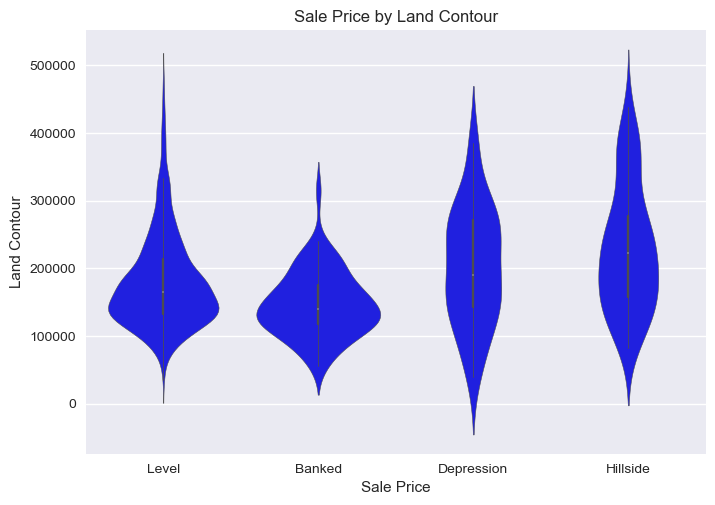

In [423]:
sns.violinplot(y='Sale Price',x='Land Contour',data=df_realestate,color='b')
plt.title('Sale Price by Land Contour')
plt.xlabel('Sale Price')
plt.ylabel('Land Contour')

The shape of both the graphs is the exact same. The only difference being the color

In [ ]:
### Section 6d: Create Boxplot for Sale Price by Neighborhood

/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_4090/1949147769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sale Price',y='Neighborhood', data=df_realestate, palette='dark')


Text(0, 0.5, 'Neighborhood')

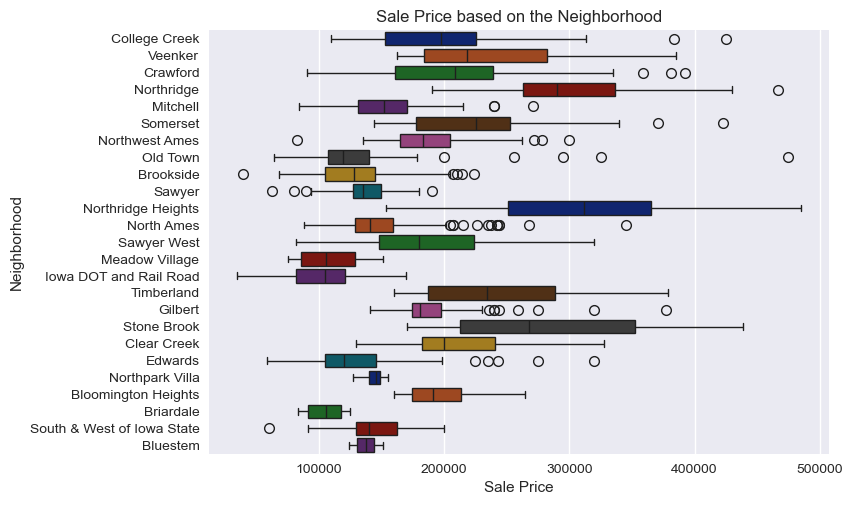

In [442]:
sns.boxplot(x='Sale Price',y='Neighborhood', data=df_realestate, palette='dark')
plt.title('Sale Price based on the Neighborhood')
plt.xlabel('Sale Price')
plt.ylabel('Neighborhood')

Based on the data shown to me it looks like we have a few outliers outside of the whiskers.

In [429]:
# Created a boxplot based on the sale price of homes based on the neighborhood they are in

## 7. Comparing Features to Visualize a Relationship

### Section 7a: Scatterplot for 1st and 2nd floor

<Axes: xlabel='1st Floor Area', ylabel='2nd Floor Area'>

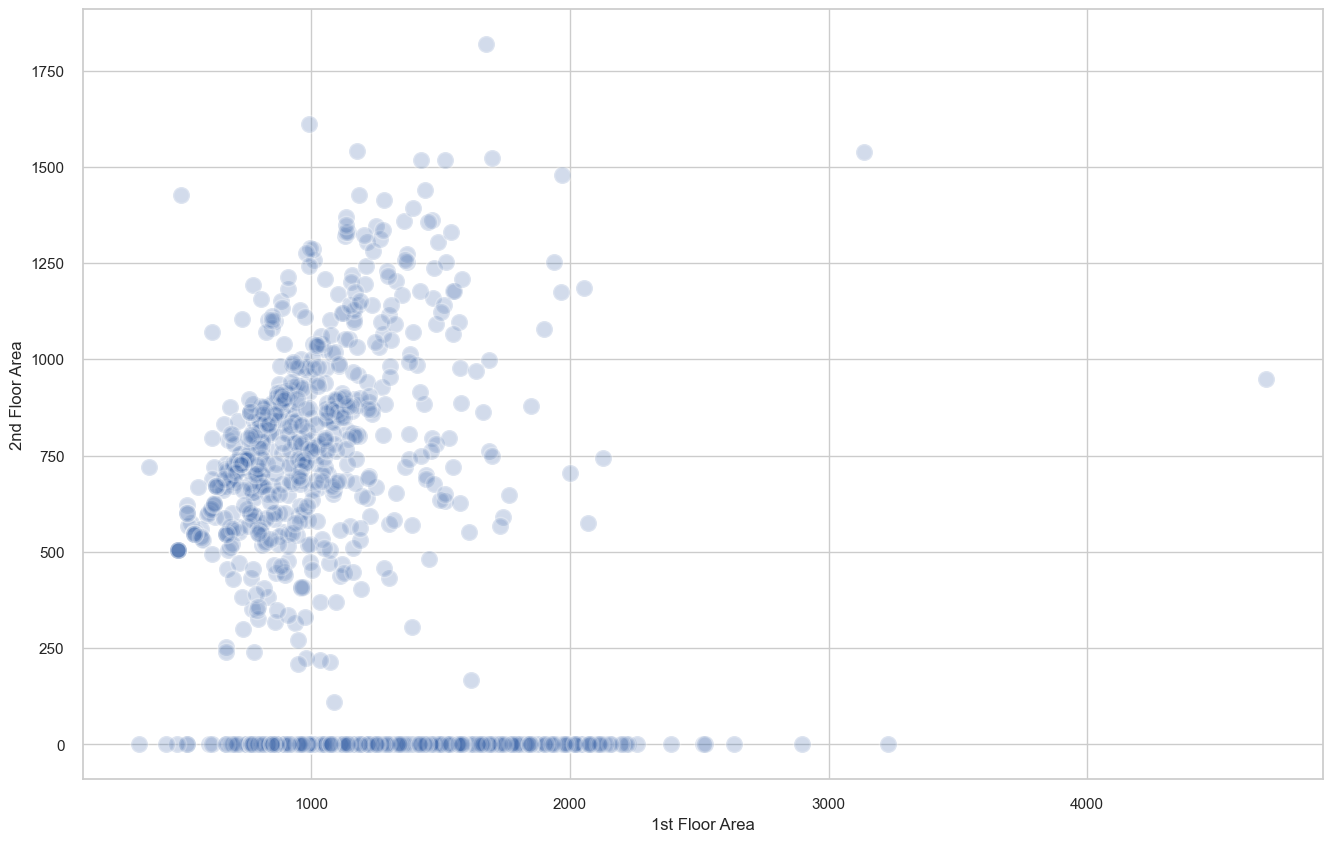

In [467]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_realestate['1st Floor Area'],y= df_realestate['2nd Floor Area'], alpha=.25, data=df_realestate, s=150, edgecolor='white', linewidth=2)

This scatterplot looks like it could have a modeate relationship

In [470]:
# In this section we created a scatterplot comparing the 1st and 2nd floor

### Section 7b: Scatterplot for ‘Living Area Above Grade’ and ‘Sale Price’ and ‘Kitchen Quality’.


<Axes: xlabel='Living Area Above Grade', ylabel='Sale Price'>

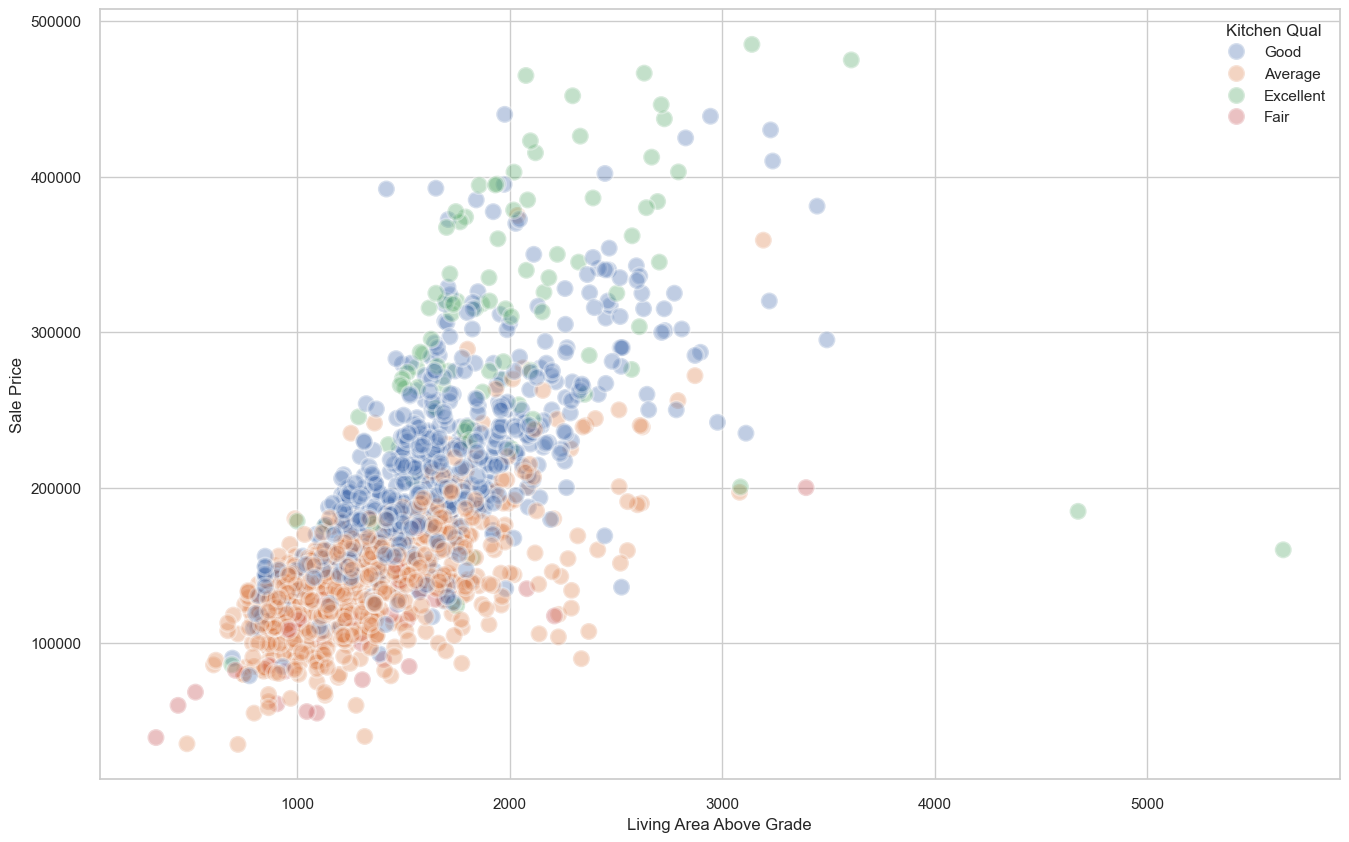

In [487]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_realestate['Living Area Above Grade'],y= df_realestate['Sale Price'], alpha=.35, data=df_realestate,s=150, edgecolor='white', linewidth=2, hue=df_realestate['Kitchen Qual'])

This scatterplot has a strong relationship 

In [ ]:
# Created a scatterplot with the hue of Kitchen Qual while comparing living area above grade and the sale price.


### Section 7c: Create a Pairplot


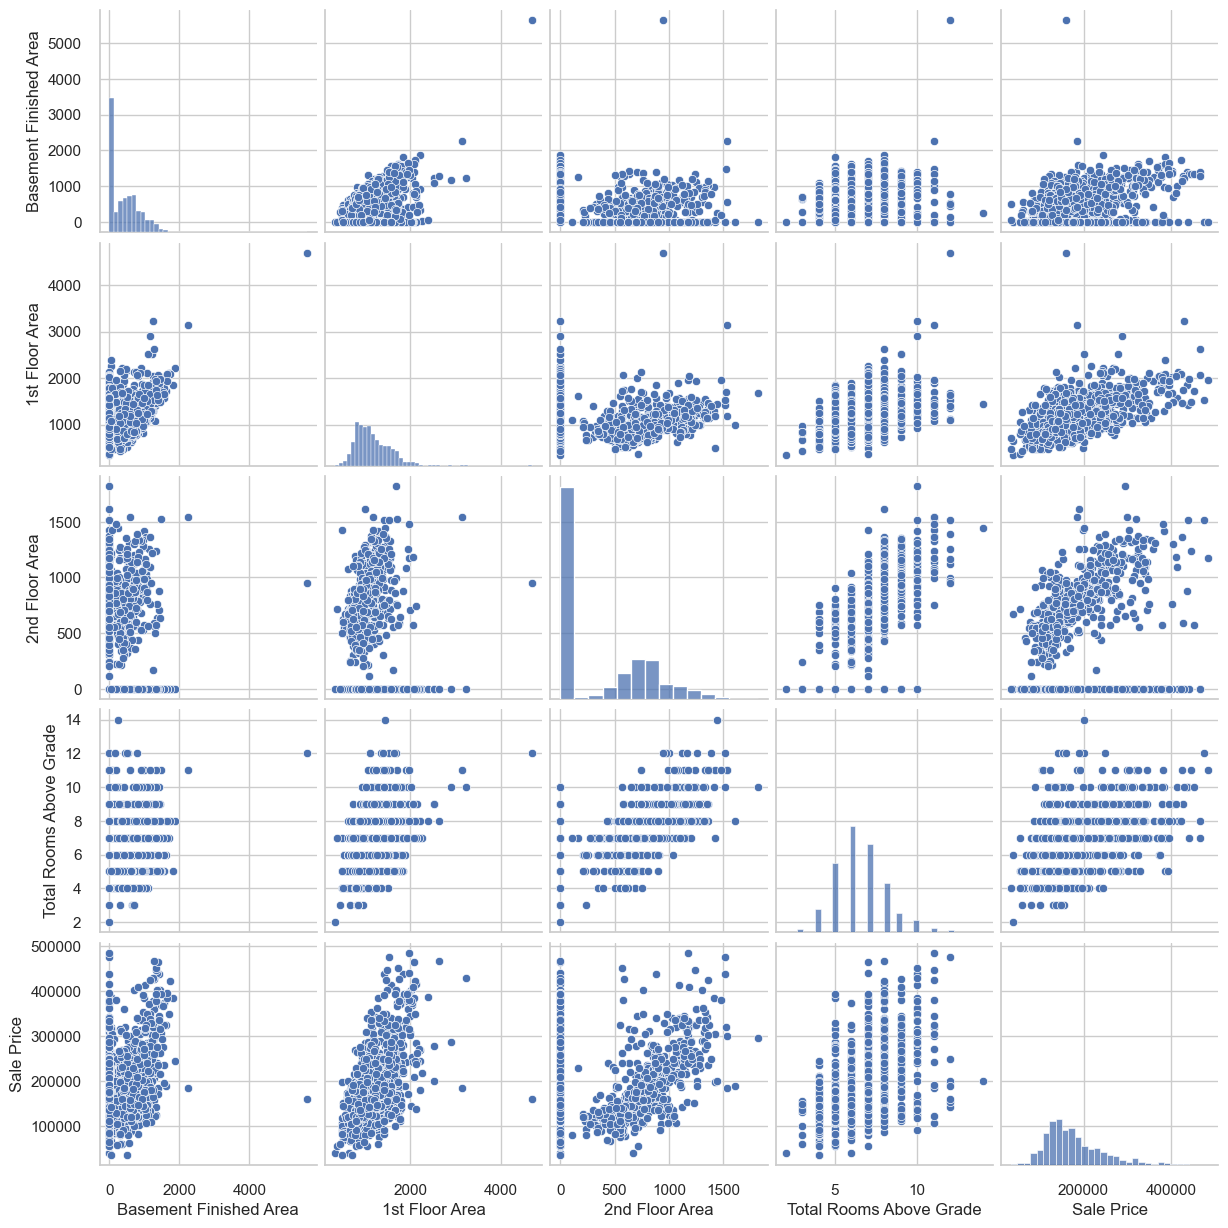

In [495]:
sns.pairplot(df_realestate[['Basement Finished Area','1st Floor Area','2nd Floor Area','Total Rooms Above Grade','Sale Price']])

I can see the realtionship between each of the 5 pairs. 

In [498]:
#Created a pairplot to create a matrix of all 5 variables in the data set.